In [19]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

(270, 268, 3)


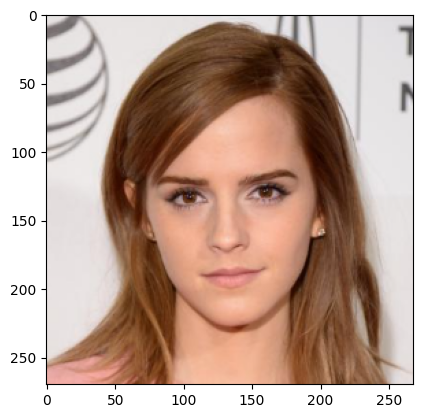

In [20]:
real_image = cv2.imread('images/real_image2.png')
real_image = cv2.cvtColor(real_image, cv2.COLOR_BGR2RGB)
plt.imshow(real_image)
print(real_image.shape)

(270, 268, 3)


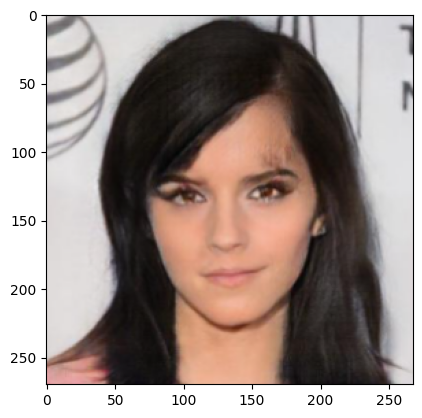

In [21]:
fake_image = cv2.imread('images/fake_image2.png')
fake_image = cv2.resize(fake_image, (real_image.shape[1], real_image.shape[0]))
fake_image = cv2.cvtColor(fake_image, cv2.COLOR_BGR2RGB)
plt.imshow(fake_image)
print(fake_image.shape)

# Get feature map

In [22]:
# Visualize data
def visualize(real_image, fake_image, feat_map):
    _, axes = plt.subplots(1, 4, figsize=(18, 5))
    axes[0].imshow(real_image)
    axes[0].set_title('real_image')
    axes[0].axis('off')
    
    axes[1].imshow(fake_image)
    axes[1].set_title('fake_image')
    axes[1].axis('off')
    
    axes[2].imshow(feat_map, cmap='jet')
    axes[2].set_title('heat_map')
    axes[2].axis('off')

    axes[3].imshow(fake_image, alpha=0.4)
    axes[3].imshow(feat_map, cmap='jet', alpha=0.6)
    axes[3].set_title('mask')
    axes[3].axis('off')
    
    plt.show()

In [23]:
real_image_gray = cv2.cvtColor(real_image, cv2.COLOR_BGR2GRAY)
fake_image_gray = cv2.cvtColor(fake_image, cv2.COLOR_BGR2GRAY)

real_image_fl = np.array(real_image_gray, dtype=np.float32)
fake_image_fl = np.array(fake_image_gray, dtype=np.float32)

feat_map = np.abs(real_image_fl - fake_image_fl)

## Filter and rescale

In [24]:
def apply_mathematics(image):
    image = np.exp(image)
    return image

def soft_ratio(x, p=2):
    max_val = np.max(x)
    result = (x ** p) / (x ** p + (max_val - x) ** p)
    return result

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def filter_and_rescale(image, thres_hold, math='soft_ratio', thres_hold_before=0.2):
    if math == 'exp':
        # rescale
        max_value = np.max(image)
        min_value = np.min(image)
        image = (image - min_value) / (max_value - min_value)
        
        # apply math
        image = apply_mathematics(image)
        max_value = np.max(image)
        min_value = np.min(image)
        image = (image - min_value) / (max_value - min_value)
    elif math == 'soft_ratio':
        image = soft_ratio(image, p=1.5)
    
    # filter
    image = np.where(image < thres_hold, 0, image)
    
    return image


649


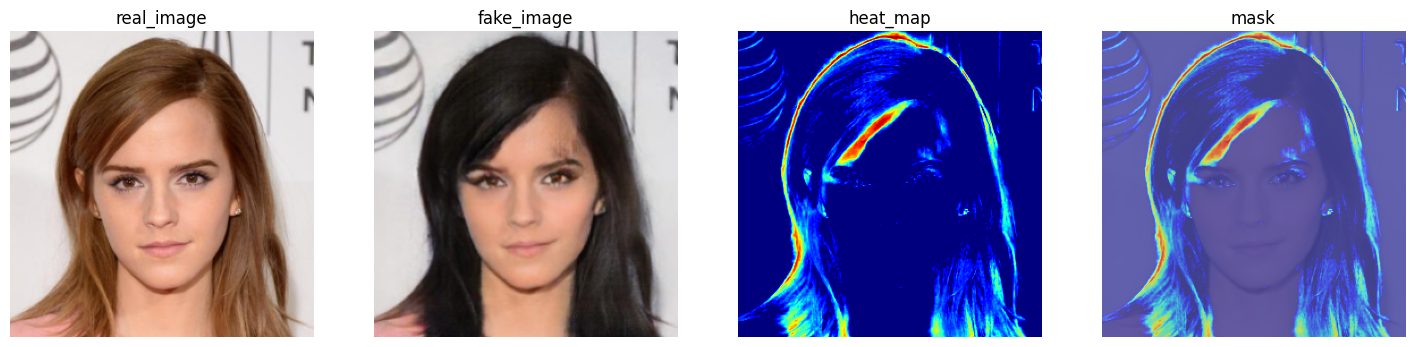

In [25]:
rescaled_image = filter_and_rescale(feat_map, thres_hold=0.1, math='soft_ratio')
print(np.sum(rescaled_image > 0.8))
visualize(real_image, fake_image, rescaled_image)

58


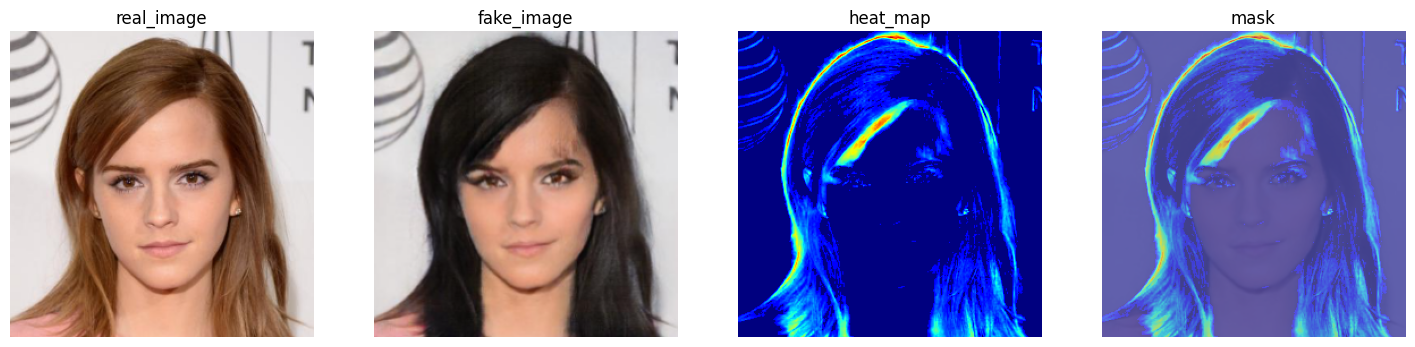

In [26]:
rescaled_image = filter_and_rescale(feat_map, thres_hold=0.1, math='exp')
print(np.sum(rescaled_image > 0.8))
visualize(real_image, fake_image, rescaled_image)

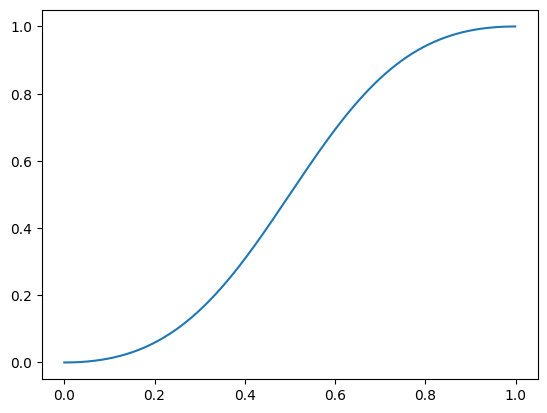

In [27]:
x = np.arange(0, 1, 0.001)
value = soft_ratio(x)
plt.plot(x, value)